In [1]:
import numpy as np

In [2]:
#This following is so that this will work with Latex, see
#http://bkanuka.com/articles/native-latex-plots/
import matplotlib as mpl
mpl.use('pgf')

In [3]:
def figsize(scale):                                 # I think scale is the size you want it on the page
    fig_width_pt = 433.62001                        # Get this from LaTeX using \the\textwidth
    inches_per_pt = 1.0/72.0                        # Convert pt to inch
    golden_mean = (np.sqrt(5.0)-1.0)/2.0            # Aesthetic ratio (you could change this)
    fig_width = fig_width_pt*inches_per_pt*scale    # width in inches
    fig_height = fig_width*golden_mean              # height in inches
    fig_size = [fig_width,fig_height]
    return fig_size

pgf_with_lualatex = {                      # Setup matplotlib to use latex for output
    "pgf.texsystem": "lualatex",           # Change this if using xetex or luatex
    "text.usetex": True,                   # Use LaTeX to write all text
    #Fonts
    "font.family": "serif",                # Get from the pdf font function on the doc
    "font.serif": "Computer Modern Roman",      
    "font.sans-serif": "Computer Modern Sans serif",
    "font.monospace": [], # Blank entries should cause plots to inherit fonts from the document
    #Text size
    "font.size": 11,# Document default is 11pt font.
    #"text.fontsize": 11,
    "axes.labelsize": 11,
    "legend.fontsize": 8,               # Make the legend/label fonts a little smaller
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    ##Axis
    #"axes.labelpad": 2,     # space between label and axis 
    "figure.figsize": figsize(1.0),     # default fig size of 1.0 textwidth
    #Packages
    "pgf.preamble": [
        r"\usepackage[utf8x]{inputenc}",    # use utf8 fonts becasue your computer can handle it :)
        r"\usepackage[T1]{fontenc}",        # plots will be generated using this preamble
        r"\usepackage{amsmath}",  #need to add math or the ^ won't work
        r"\usepackage{amssymb}"]
    }

mpl.rcParams.update(pgf_with_lualatex)

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import quad
from matplotlib.ticker import AutoMinorLocator

In [5]:
%matplotlib inline
plt.style.use('seaborn-ticks')
sns.set_palette("muted")

In [6]:
def wood_saxon(r, R, a, rho=1.0):
    return np.divide(rho, 1.0 + np.exp(np.divide(r-R,a)))

def wood_saxon_mod(r, R, a, rho=1.0):
    return np.divide(rho*np.square(r), 1.0 + np.exp(np.divide(r-R,a)))

In [7]:
rho_p = 13.0/(4.0*np.pi*quad(wood_saxon_mod, 0.0, np.inf, args=(2.904, 0.54))[0])
rho_n = 14.0/(4.0*np.pi*quad(wood_saxon_mod, 0.0, np.inf, args=(2.913, 0.54))[0])

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: overflow encountered in exp
  """


In [8]:
rho_p, rho_n

(0.0944696013636524, 0.10095522932402666)

In [9]:
radius = np.linspace(0.0, 6.0, 1000)

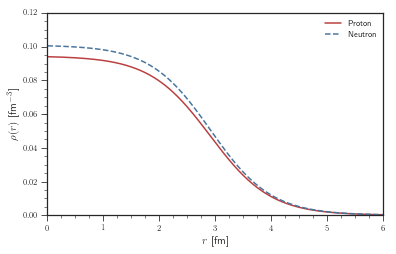

In [10]:
fig, ax = plt.subplots(figsize=figsize(1))
ax.plot(radius, wood_saxon(radius, 2.904, 0.54, rho=rho_p), label='Proton', ls='-', color=sns.xkcd_rgb['dull red'])
ax.plot(radius, wood_saxon(radius, 2.913, 0.54, rho=rho_n), label='Neutron', ls='--', color=sns.xkcd_rgb['dull blue'])
ax.set_xlim(min(radius), max(radius))
ax.set_ylim(0.0, 0.12)
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.legend(loc='upper right')
ax.set_xlabel('$r$ [fm]')
ax.set_ylabel('$\\rho(r)$ [fm$^{-3}$]')
plt.savefig('plots/al_nucleon_density.png', bbox_inches='tight')
plt.savefig('plots/al_nucleon_density.pdf', bbox_inches='tight')
plt.savefig('plots/al_nucleon_density.pgf', bbox_inches='tight')
plt.show()